In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import json

In [132]:
class eye_to_ear:
    def __init__(self, mapname):
        try:
            f = open(mapname, 'r')
            self.mapdata = json.load(f)
        except:
            print("error: wrong mapname")
            sys.exit()
        return
    
    def show_map(self):
        print(self.mapdata)
        return
    
    def is_collision(self, pos):
        return self.in_objects(pos) or self.is_outside(pos)
        
    def in_objects(self, pos):
        obj = self.mapdata['objects']
        for i in obj:
            count = 0
            if (pos[0] > obj[i]['x'][0]) & (pos[0] < obj[i]['x'][1]): count += 1
            if (pos[1] > obj[i]['y'][0]) & (pos[1] < obj[i]['y'][1]): count += 1
            if (pos[2] > obj[i]['z'][0]) & (pos[2] < obj[i]['z'][1]): count += 1
            if count == 3: return True
        return False
    
    def is_outside(self, pos):
        if (pos[0] > self.mapdata['mapsize']['x_max']) | (pos[0] < 0): return True
        if (pos[1] > self.mapdata['mapsize']['y_max']) | (pos[1] < 0): return True
        if (pos[2] > self.mapdata['mapsize']['z_max']) | (pos[2] < 0): return True
        return False
    
    def calc_height(self):
        pos = self.pos.copy()
        obj = self.mapdata['objects']
        while(self.in_objects(pos) == False):
            pos[2] -= 0.01
            if pos[2] < 0:
                return (self.pos[2])
        return self.pos[2] - pos[2]
    
    def set_pos(self, x, y, z):
        pos = np.array([x, y, z], dtype="float64")
        if self.is_collision(pos):
            print("error: wrong position")
            return
        self.pos = pos
        print("now_pos =", self.pos)
        return

    def set_angle(self, deg):
        if deg < 0 or 360 <= deg:
            print("error: angle must be [0,360)")
            return
        print("now_angle =", deg)
        self.deg = deg
        
    def scan(self):
        self.disdata = []
        try:
            pos = self.pos.copy()
            acc = np.array([np.sin(np.pi*self.deg/180), -1*np.cos(np.pi*self.deg/180)])
        except ValueError:
            print("error: position or angle is not defined")
            return

        for ele in range(0,180):
            pos_3d = pos.copy()
            acc_3d = acc * np.sin(np.pi*ele/180)
            acc_3d = np.append(acc_3d, -1*np.cos(np.pi*ele/180)) * 0.1
            #print(acc_3d, np.linalg.norm(acc_3d))
            
            dis = 0
            while(self.is_collision(pos_3d) == False):
                dis += 0.1
                pos_3d += acc_3d
            print(ele, pos_3d)
            self.disdata.append(dis)

        x_axis = np.arange(0, len(self.disdata))
        plt.figure()
        plt.plot(x_axis, self.disdata)
        plt.show()

now_pos = [ 5. 50.  2.]
now_angle = 90
0 [ 5. 50.  1.]
1 [ 5.01919765 50.          0.90016754]
2 [ 5.03838945 50.          0.90067009]
3 [ 5.05756955 50.          0.90150751]
4 [ 5.07673212 50.          0.90267954]
5 [ 5.09587132 50.          0.90418583]
6 [ 5.11498131 50.          0.90602592]
7 [ 5.13405628 50.          0.90819923]
8 [ 5.15309041 50.          0.91070512]
9 [ 5.17207791 50.          0.91354283]
10 [ 5.191013   50.          0.91671147]
11 [ 5.20988989 50.          0.9202101 ]
12 [ 5.22870286 50.          0.92403764]
13 [ 5.24744616 50.          0.92819293]
14 [ 5.26611409 50.          0.9326747 ]
15 [ 5.28470095 50.          0.93748159]
16 [ 5.30320109 50.          0.94261213]
17 [ 5.32160888 50.          0.94806477]
18 [ 5.33991869 50.          0.95383783]
19 [ 5.35812497 50.          0.95992957]
20 [ 5.37622216 50.          0.96633812]
21 [ 5.39420474 50.          0.97306153]
22 [ 5.41206725 50.          0.98009776]
23 [ 5.42980424 50.          0.98744466]
24 [ 5.4474

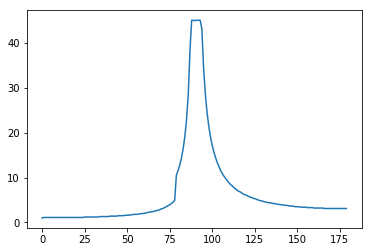

In [133]:
ete = eye_to_ear("station_platform.json")
ete.set_pos(5,50,2)
ete.set_angle(90)
ete.calc_height()
ete.scan()

In [19]:
ete.show_map()

{'mapsize': {'x_max': 50, 'y_max': 100, 'z_max': 5}, 'objects': {'platform': {'x': [0, 10], 'y': [0, 100], 'z': [0, 1]}}}
